Lê Phương Nam
B22DCCN555 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import gabor_kernel
import scipy.ndimage as nd

Đoạn mã trên tạo ra một ngân hàng bộ lọc Gabor với 4 hướng khác nhau, 2 giá trị độ lệch chuẩn khác nhau và 2 giá trị tần số khác nhau. Tổng cộng, sẽ có 
4
×
2
×
2 = 16



In [12]:
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency,theta=theta, sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

2. Xác định hàm sau để tích hợp hình ảnh đầu vào với nhân Gabor
(có phần thực và phần ảo):

In [19]:
def power(image, kernel):
    #chuẩn hóa ảnh
    image = (image - image.mean()) / image.std()
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 + 
                   nd.convolve(image, np.imag(kernel), mode='wrap')**2)

Đối với mỗi lớp trong số bốn lớp kết cấu, chúng ta sẽ sử dụng hai hình ảnh,một làm tham chiếu
và cái còn lại là hình ảnh thử nghiệm. 

Trước tiên hãy tải các hình ảnh tham khảo cho từng
bốn lớp chúng tôi đã chọn bằng đoạn mã sau

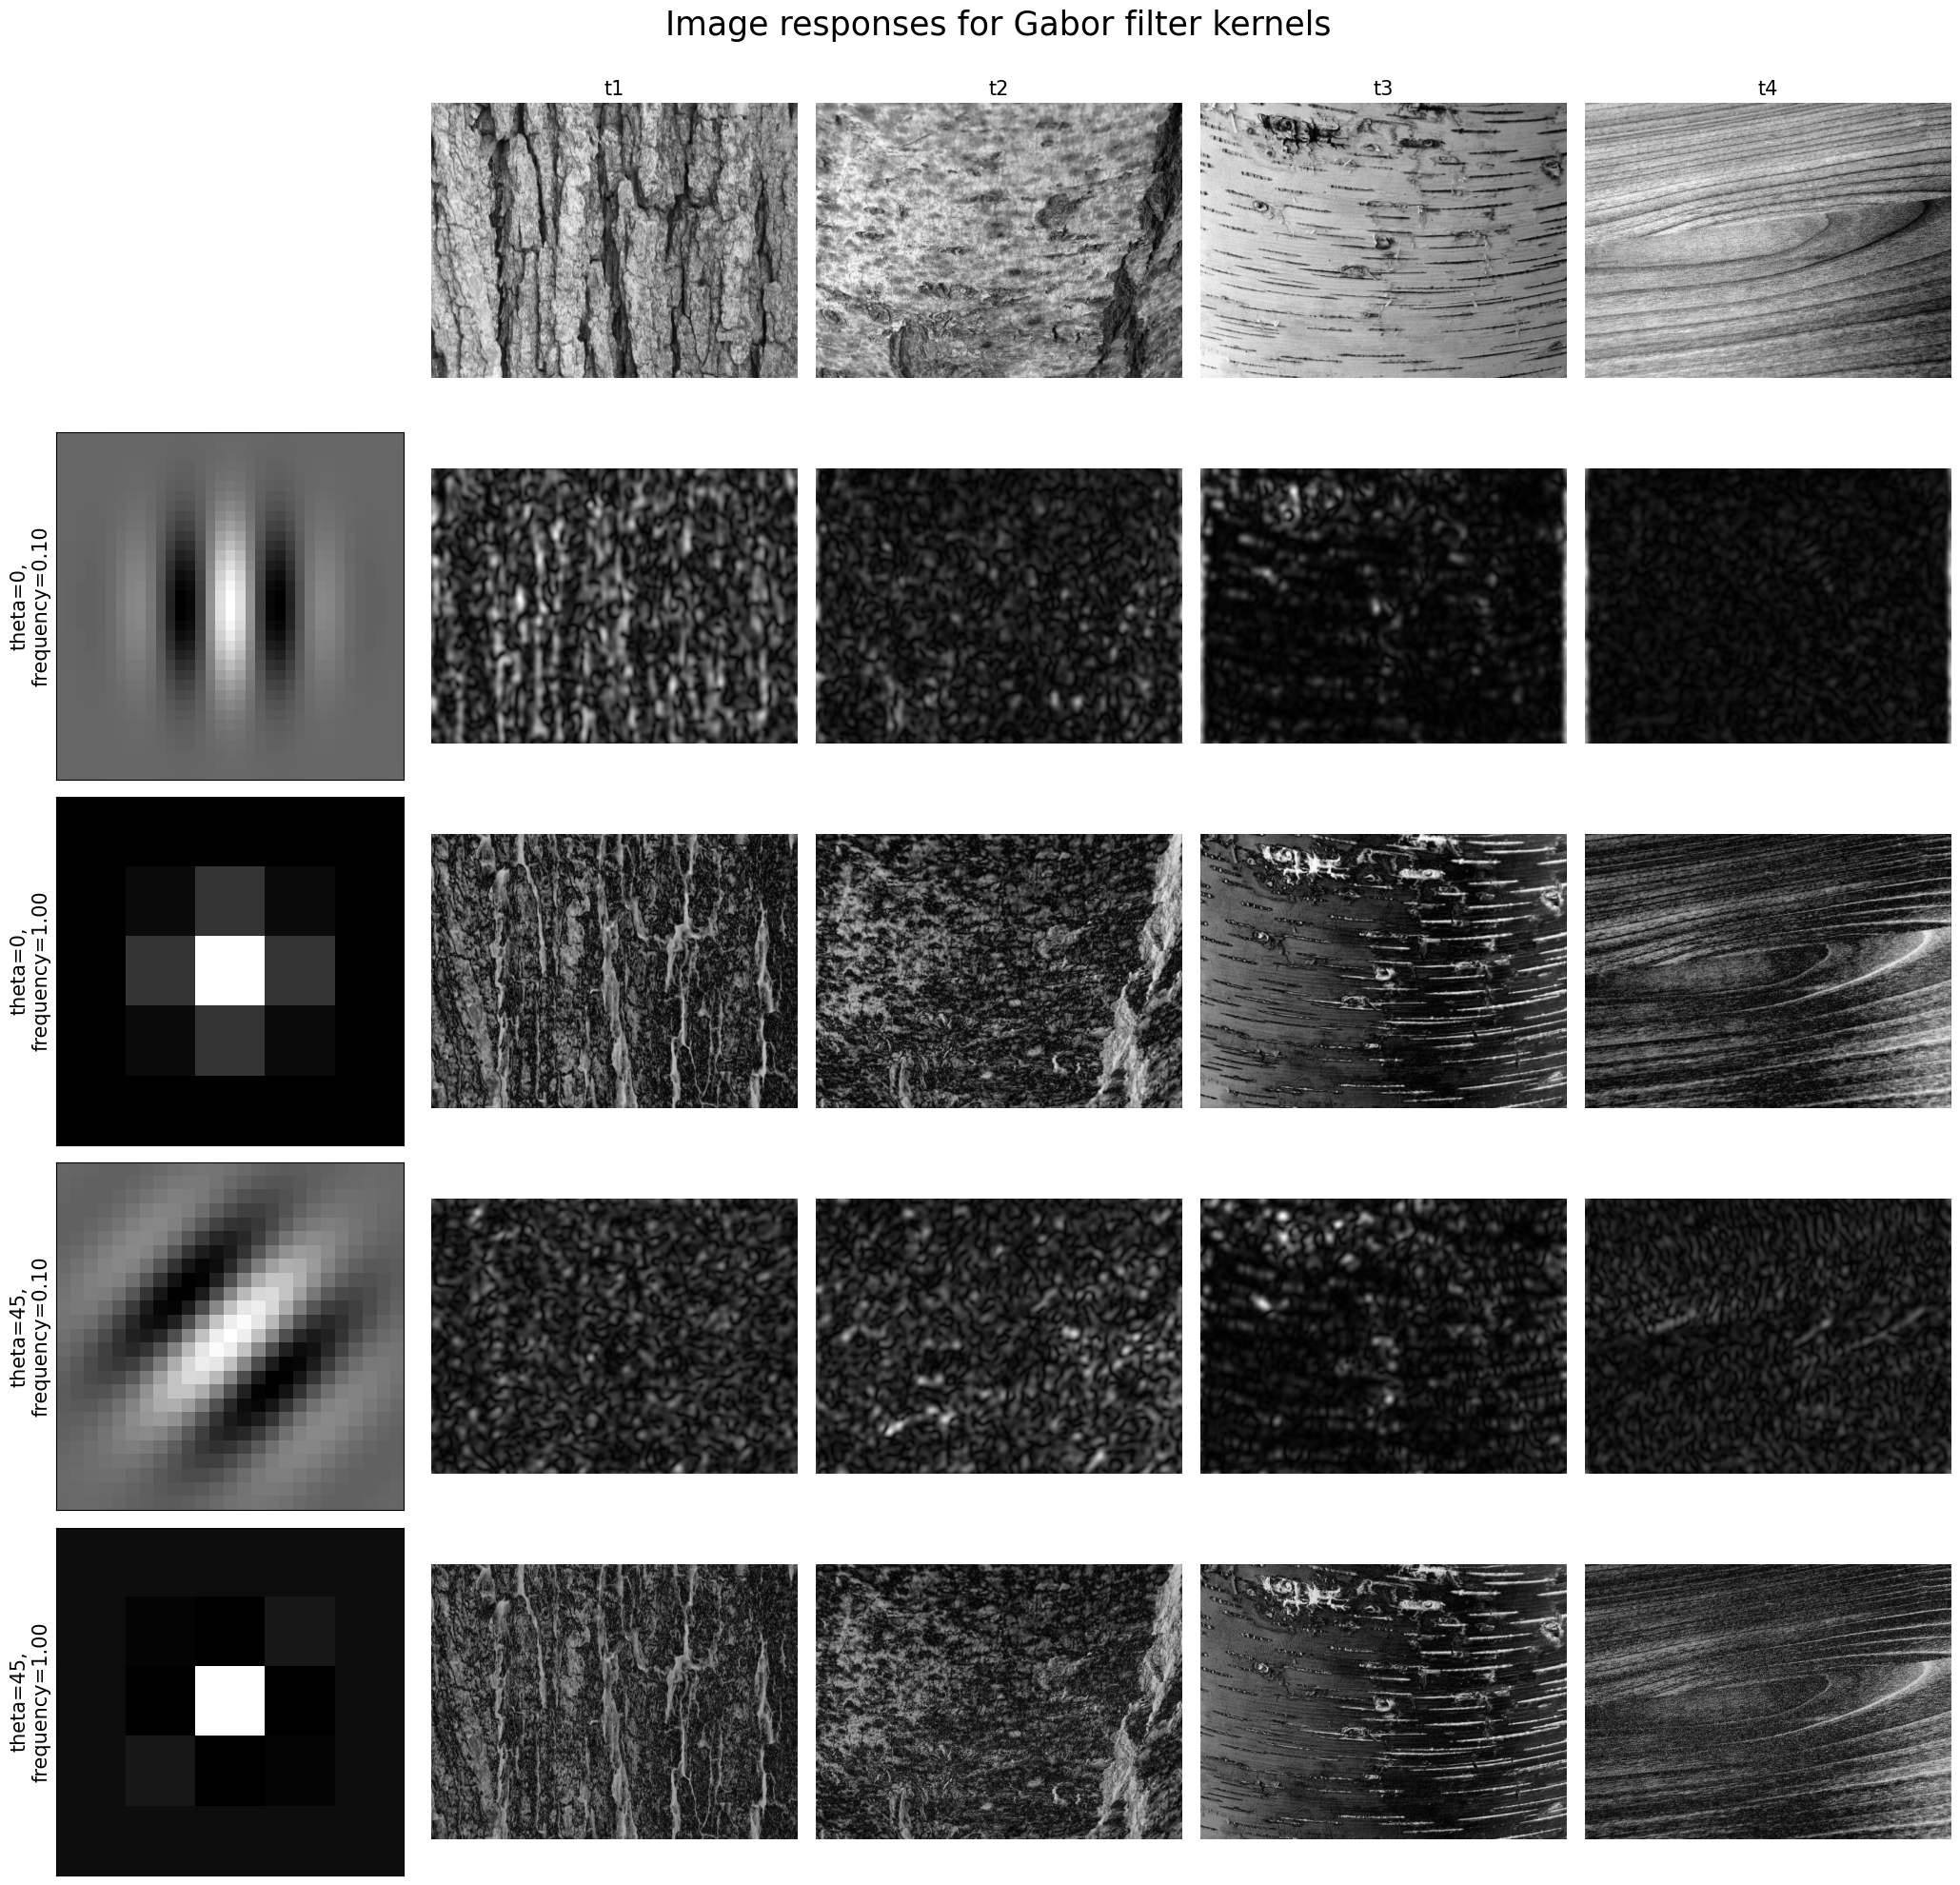

In [30]:
image_names = ['uiuc_texture_dataset/T01/T01_01.jpg',
               'uiuc_texture_dataset/T02/T02_01.jpg',
               'uiuc_texture_dataset/T03/T03_01.jpg',
               'uiuc_texture_dataset/T04/T04_01.jpg',
              ]
labels=['t1','t2','t3','t4']
images = []
for image_name in image_names:
    image = imread(image_name)
    if len(image.shape) == 3 and image.shape[2] == 3:
        # Chuyển đổi ảnh màu RGB sang ảnh xám
        image = rgb2gray(image)
    images.append(image)
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4.* np.pi
    for frequency in (0.1,1):
        kernel = gabor_kernel(frequency,theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
plt.gray()
plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
fig.suptitle('Image responses for Gabor filter kernels', fontsize=25)

axes[0][0].axis('off')
for label, img, ax in zip(labels, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=15)
    ax.axis('off')
for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel))
    ax.set_ylabel(label, fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()

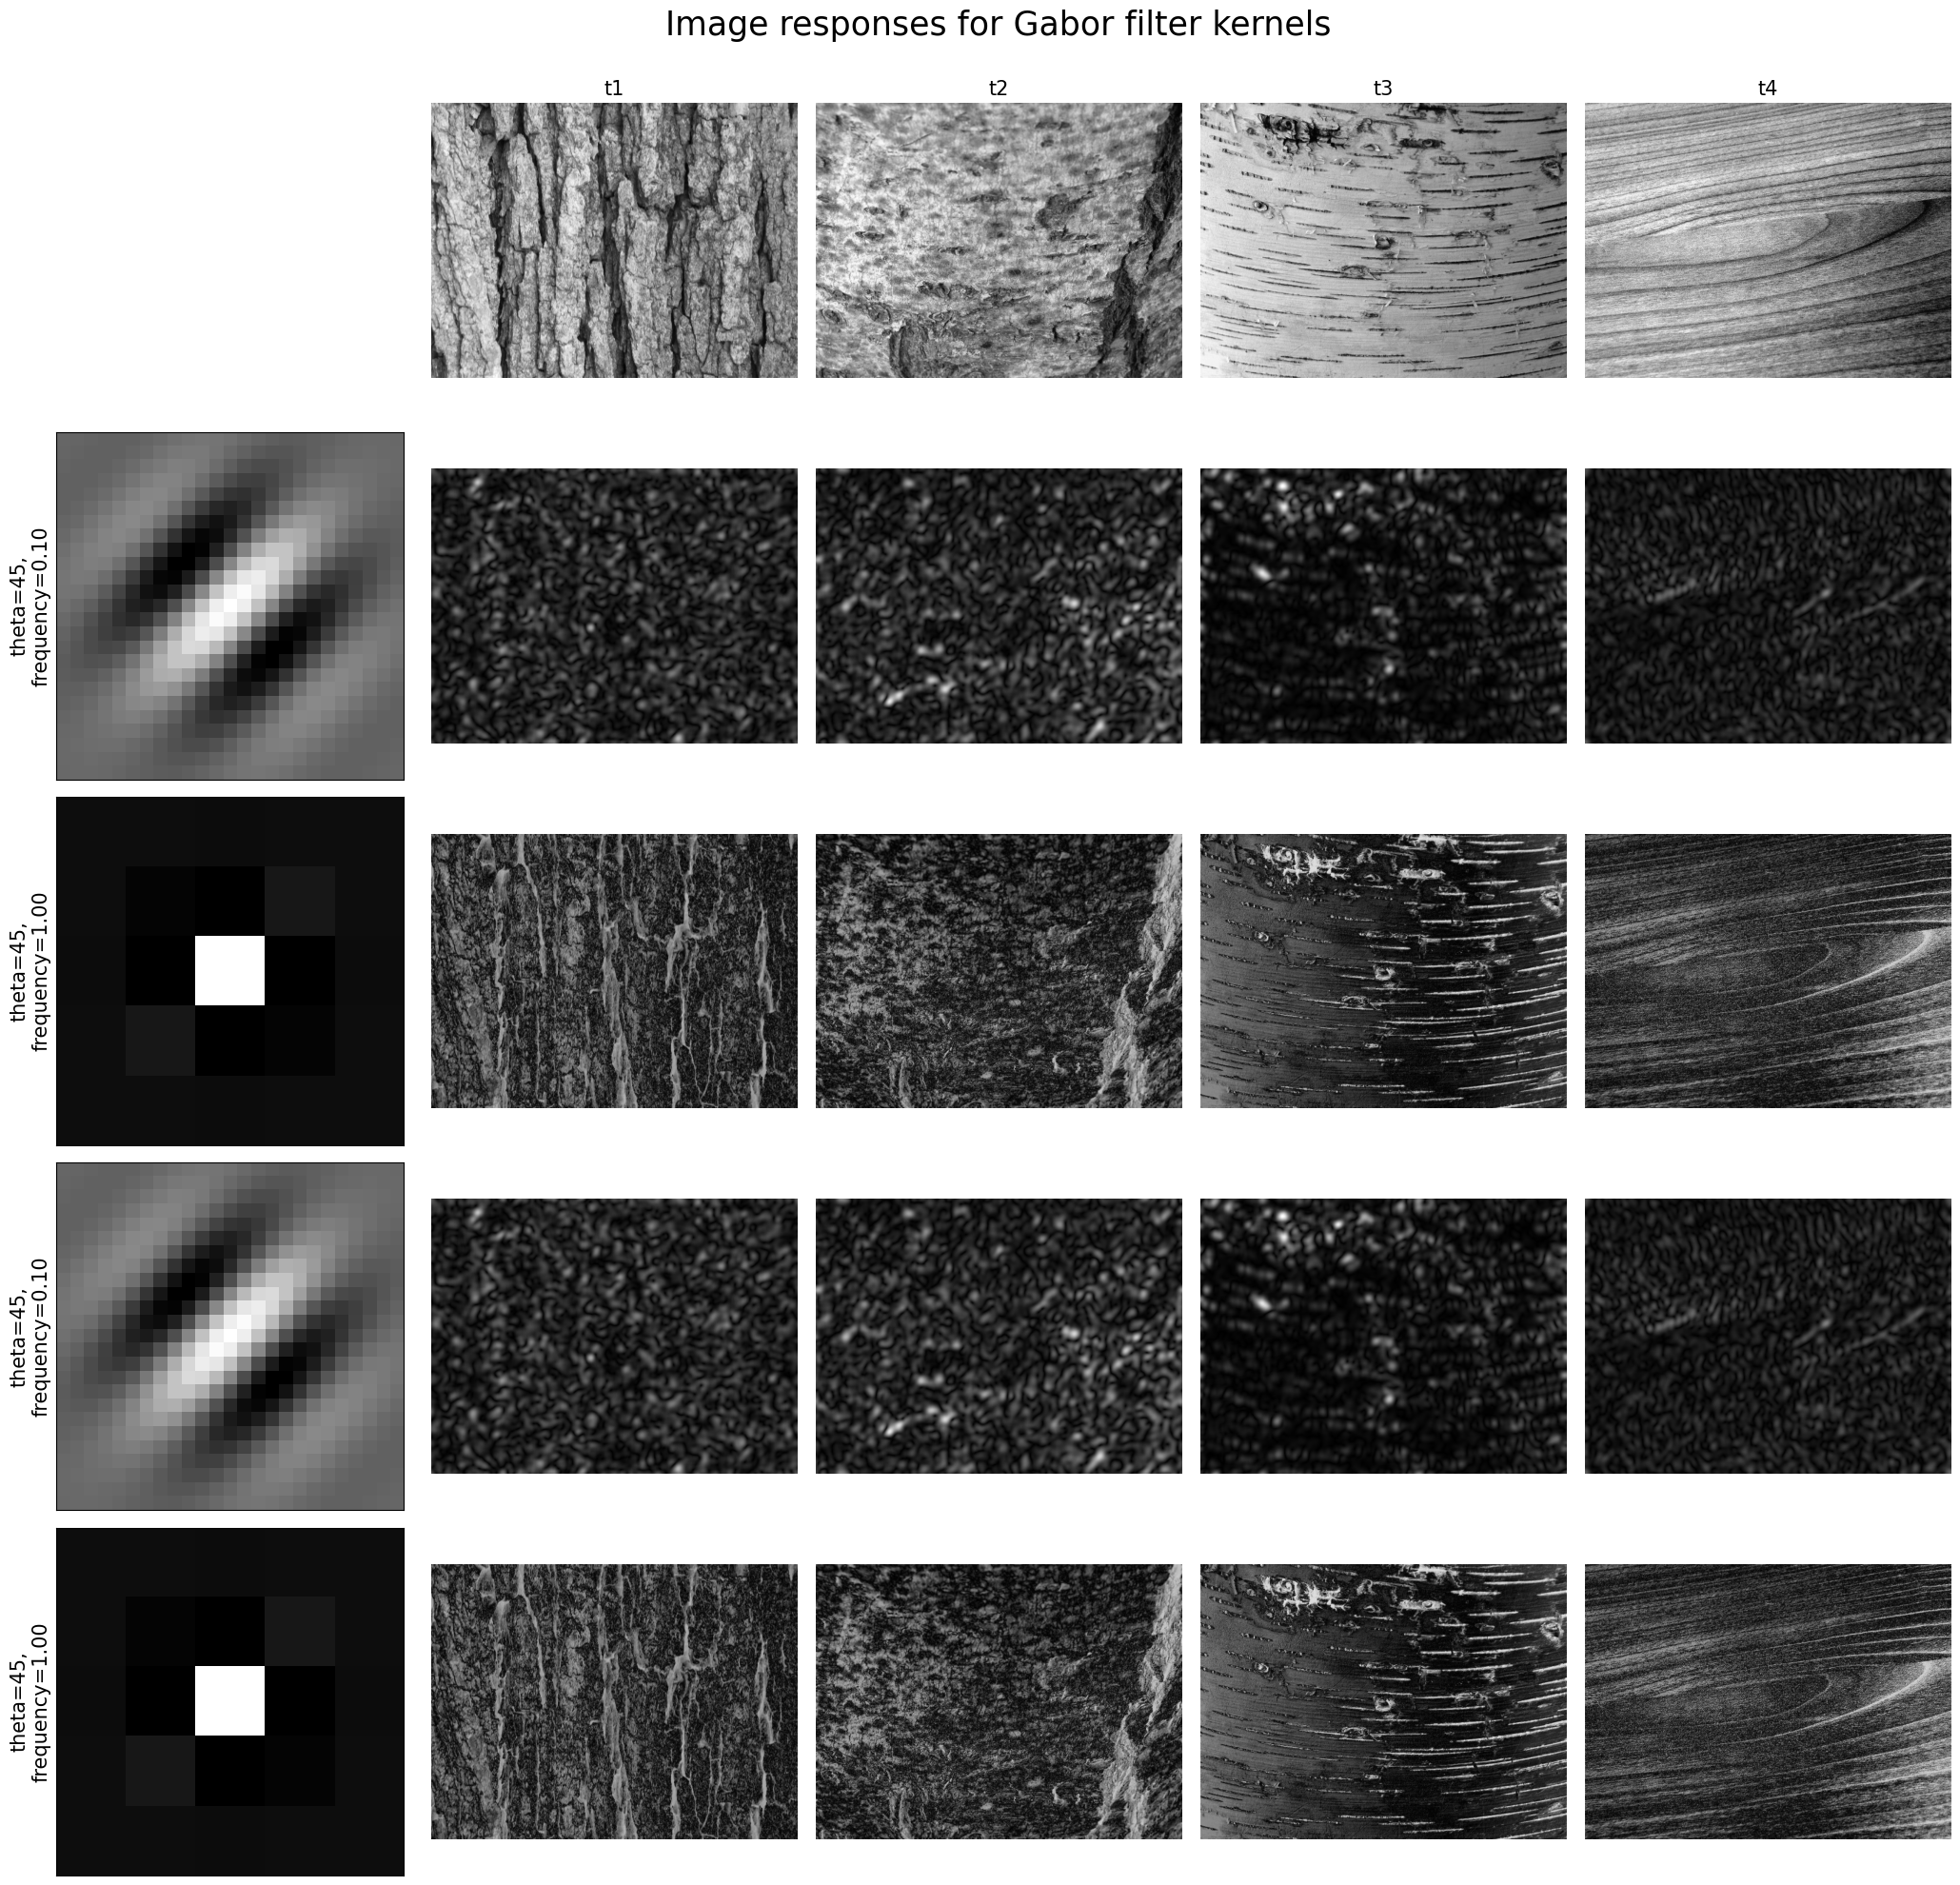

In [32]:
image_names = ['uiuc_texture_dataset/T01/T01_01.jpg',
               'uiuc_texture_dataset/T02/T02_01.jpg',
               'uiuc_texture_dataset/T03/T03_01.jpg',
               'uiuc_texture_dataset/T04/T04_01.jpg',
              ]
labels=['t1','t2','t3','t4']
images = []
for image_name in image_names:
    image = imread(image_name)
    if len(image.shape) == 3 and image.shape[2] == 3:
        # Chuyển đổi ảnh màu RGB sang ảnh xám
        image = rgb2gray(image)
    images.append(image)
results = []
kernel_params = []
for theta in (0,1):
    #theta = theta / 4. * np.pi
    theta=1*np.pi/4;
    for frequency in (0.1,1):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
plt.gray()
plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
fig.suptitle('Image responses for Gabor filter kernels', fontsize=25)

axes[0][0].axis('off')
for label, img, ax in zip(labels, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=15)
    ax.axis('off')
for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel))
    ax.set_ylabel(label, fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()

In [33]:
def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        # Kiểm tra kích thước của kernel
        if kernel.ndim != image.ndim:
            raise ValueError(f"Kernel dimension {kernel.ndim} does not match image dimension {image.ndim}.")
        
        # Convolve image with kernel
        filtered = nd.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i

# prepare reference features
ref_feats = np.zeros((4, len(kernels), 2), dtype=np.double)
for i in range(4):
    ref_feats[i, :, :] = compute_feats(images[i], kernels)

print('Images matched against references using Gabor filter banks:')

new_image_names = ['uiuc_texture_dataset/T01/T01_01.jpg',
               'uiuc_texture_dataset/T02/T02_01.jpg',
               'uiuc_texture_dataset/T03/T03_01.jpg',
               'uiuc_texture_dataset/T04/T04_01.jpg',
              ]

plt.figure(figsize=(10,18))
plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
for i in range(4):
    image = imread(image_name)
    if len(image.shape) == 3 and image.shape[2] == 3:
        # Chuyển đổi ảnh màu RGB sang ảnh xám
        image = rgb2gray(image)
    images.append(image)
    gray_image = rgb2gray(image)
    feats = compute_feats(image, kernels)
    mindex = match(feats, ref_feats)
    print('original: {}, match result: {} '.format(labels[i], labels[mindex]))
    plt.subplot(4,2,2*i+1), plt.imshow(image), plt.axis('off'), plt.title('Original', size=20)
    plt.subplot(4,2,2*i+2), plt.imshow(images[mindex]), plt.axis('off'), plt.title('Recognized as ({})'.format(labels[mindex]), size=20)
plt.show()

Images matched against references using Gabor filter banks:


ValueError: the input array must have size 3 along `channel_axis`, got (480, 640)

<Figure size 1000x1800 with 0 Axes>